It is simple neural network model. It predict output of signal given by one or zero by input values in matrix form

### Libraries


In [155]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Model

In [156]:
def sigmoid(x): # sigmoid function as activation function
    return 1 / (1 + np.exp(-x))

def sig_deriv(x): # derivative of sigmoid function
    return x*(1-x)    
    
def compute_loss(y_hat, y): # model loss
    return ((y_hat - y)**2).sum()


class NeuralNetwork:
    def __init__(self,x,y):
        self.x   = x  # input
        self.y   = y  # output
        self.w1  = np.random.rand(self.x.shape[1],self.x.shape[0]) # weights starts with randomly normal distribution numbers 
        self.w2  = np.random.rand(self.x.shape[0],1) # weights starts with randomly normal distribution numbers
        self.out = np.zeros(self.y.shape) # output of model, starts with zeros        
        
    def feedforward(self): # feed forward propagation
        self.hiddenlayer = sigmoid(np.dot(self.x, self.w1))
        self.out = sigmoid(np.dot(self.hiddenlayer, self.w2))

    def backprop(self):
        # Chain rule to update weights
        
        # derivative of last layer
        deriv_w2 = np.dot(self.hiddenlayer.T, (2*(self.y - self.out) * sig_deriv(self.out)))
        # derivative of previous layer
        deriv_w1 = np.dot(self.x.T,  (np.dot(2*(self.y - self.out) * sig_deriv(self.out), self.w2.T) * sig_deriv(self.hiddenlayer)))
        
        # updating weights 
        self.w1 += deriv_w1
        self.w2 += deriv_w2
                 

### Dane

In [157]:
input_matrix = np.array([[0,0,1,1],[0,1,1,0],[1,0,1,0],[1,1,1,1],[1,0,0,1]])
output_vec = (np.array([[0],[1],[1],[0],[1]]))

In [158]:
input_matrix

array([[0, 0, 1, 1],
       [0, 1, 1, 0],
       [1, 0, 1, 0],
       [1, 1, 1, 1],
       [1, 0, 0, 1]])

In [159]:
output_vec

array([[0],
       [1],
       [1],
       [0],
       [1]])

### Training


In [160]:
nn=NeuralNetwork(input_matrix,output_vec)

In [161]:
loss_values = []

In [162]:
for i in range(20):    
    for i in range(100):
        nn.feedforward()
        nn.backprop()
        loss = compute_loss(nn.out, output_vec)
        loss_values.append(loss)
    print(loss)
print(nn.out)
print(f" final loss : {loss}")

0.26818053895279764
0.04536226126875746
0.021835952730890736
0.013983618037636411
0.010171659039843428
0.007948046094029854
0.006500919841243571
0.005488096882836278
0.004741543242010513
0.0041695014998344715
0.0037177848986804938
0.003352406765555466
0.003051005846131687
0.0027982859165618483
0.002583440203702437
0.0023986229654677452
0.002238004036045239
0.0020971629422400083
0.001972688618392021
0.0018619078398178814
[[0.0030227 ]
 [0.97744906]
 [0.9959612 ]
 [0.02860581]
 [0.97742518]]
 final loss : 0.0018619078398178814


### Visualization

In [163]:
df = pd.DataFrame(input_matrix,columns=["Input1","Input2","Input3","Input4"])
df["Output"]=output_vec
df["Network_prediction"]=nn.out
df["Network_output"]=output_vec
df

,Input1,Input2,Input3,Input4,Output,Network_prediction,Network_output
0,0,0,1,1,0,0.003023,0
1,0,1,1,0,1,0.977449,1
2,1,0,1,0,1,0.995961,1
3,1,1,1,1,0,0.028606,0
4,1,0,0,1,1,0.977425,1


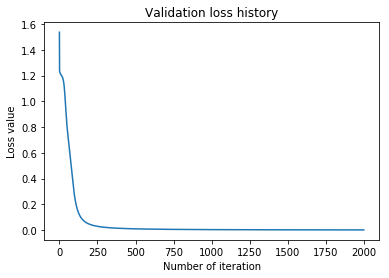

In [165]:
plt.plot(loss_values)
plt.xlabel("Number of iteration")
plt.ylabel("Loss value")
plt.title("Validation loss history")
plt.show()